<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/image_processing_project_first_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

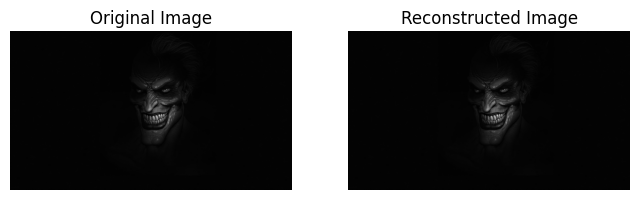

In [ ]:
# y-pca-decompose

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io

# Load the image
image = io.imread('pepak.jpg', as_gray=True)  # Load the image as grayscale

# Flatten the image to a 2D array
image_flat = image.reshape(-1, 1)  # Reshape the image to a 2D array with a single column

# Perform PCA decomposition
pca = PCA(n_components=1)  # Specify the number of components to keep
image_pca = pca.fit_transform(image_flat)

# Reconstruct the image using the PCA components
image_reconstructed = pca.inverse_transform(image_pca)
image_reconstructed = image_reconstructed.reshape(image.shape)

# Display the original and reconstructed images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

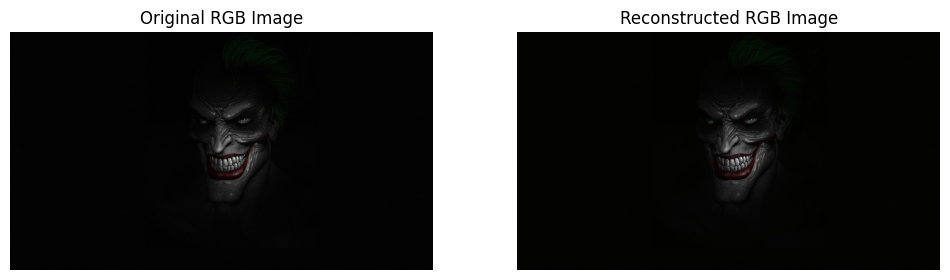

In [ ]:
# RGB -pca
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io

# Load the RGB image
image = io.imread('pepak.jpg')

# Flatten the RGB image to a 2D array
image_flat = image.reshape(-1, 3)  # Reshape the image to a 2D array with three columns (RGB channels)

# Perform PCA decomposition
pca = PCA(n_components=3)  # Specify the number of components to keep (RGB channels)
image_pca = pca.fit_transform(image_flat)

# Reconstruct the image using the PCA components
image_reconstructed = pca.inverse_transform(image_pca)
image_reconstructed = image_reconstructed.reshape(image.shape)

# Display the original and reconstructed RGB images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed.astype(np.uint8))
plt.title('Reconstructed RGB Image')
plt.axis('off')

plt.show()

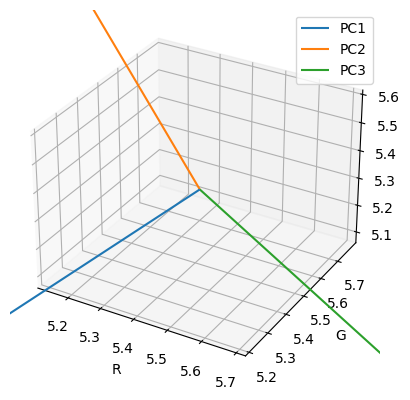

In [ ]:
# pca plot for 3d
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import io

# Load the RGB image
image = io.imread('pepak.jpg')

# Reshape the image data
image_flat = image.reshape(-1, 3)

# Perform PCA
pca = PCA(n_components=3)
image_pca = pca.fit_transform(image_flat)

# Get the principal components
components = pca.components_

# Initialize the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the origin for the quiver plot
origin = np.mean(image_flat, axis=0)

# Plot the principal components as quiver plots
for i, component in enumerate(components):
    scaled_component = component * np.max(image_flat)
    ax.quiver(*origin, *scaled_component, color=f'C{i}', label=f'PC{i+1}')

# Set labels and legend
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()

plt.show()

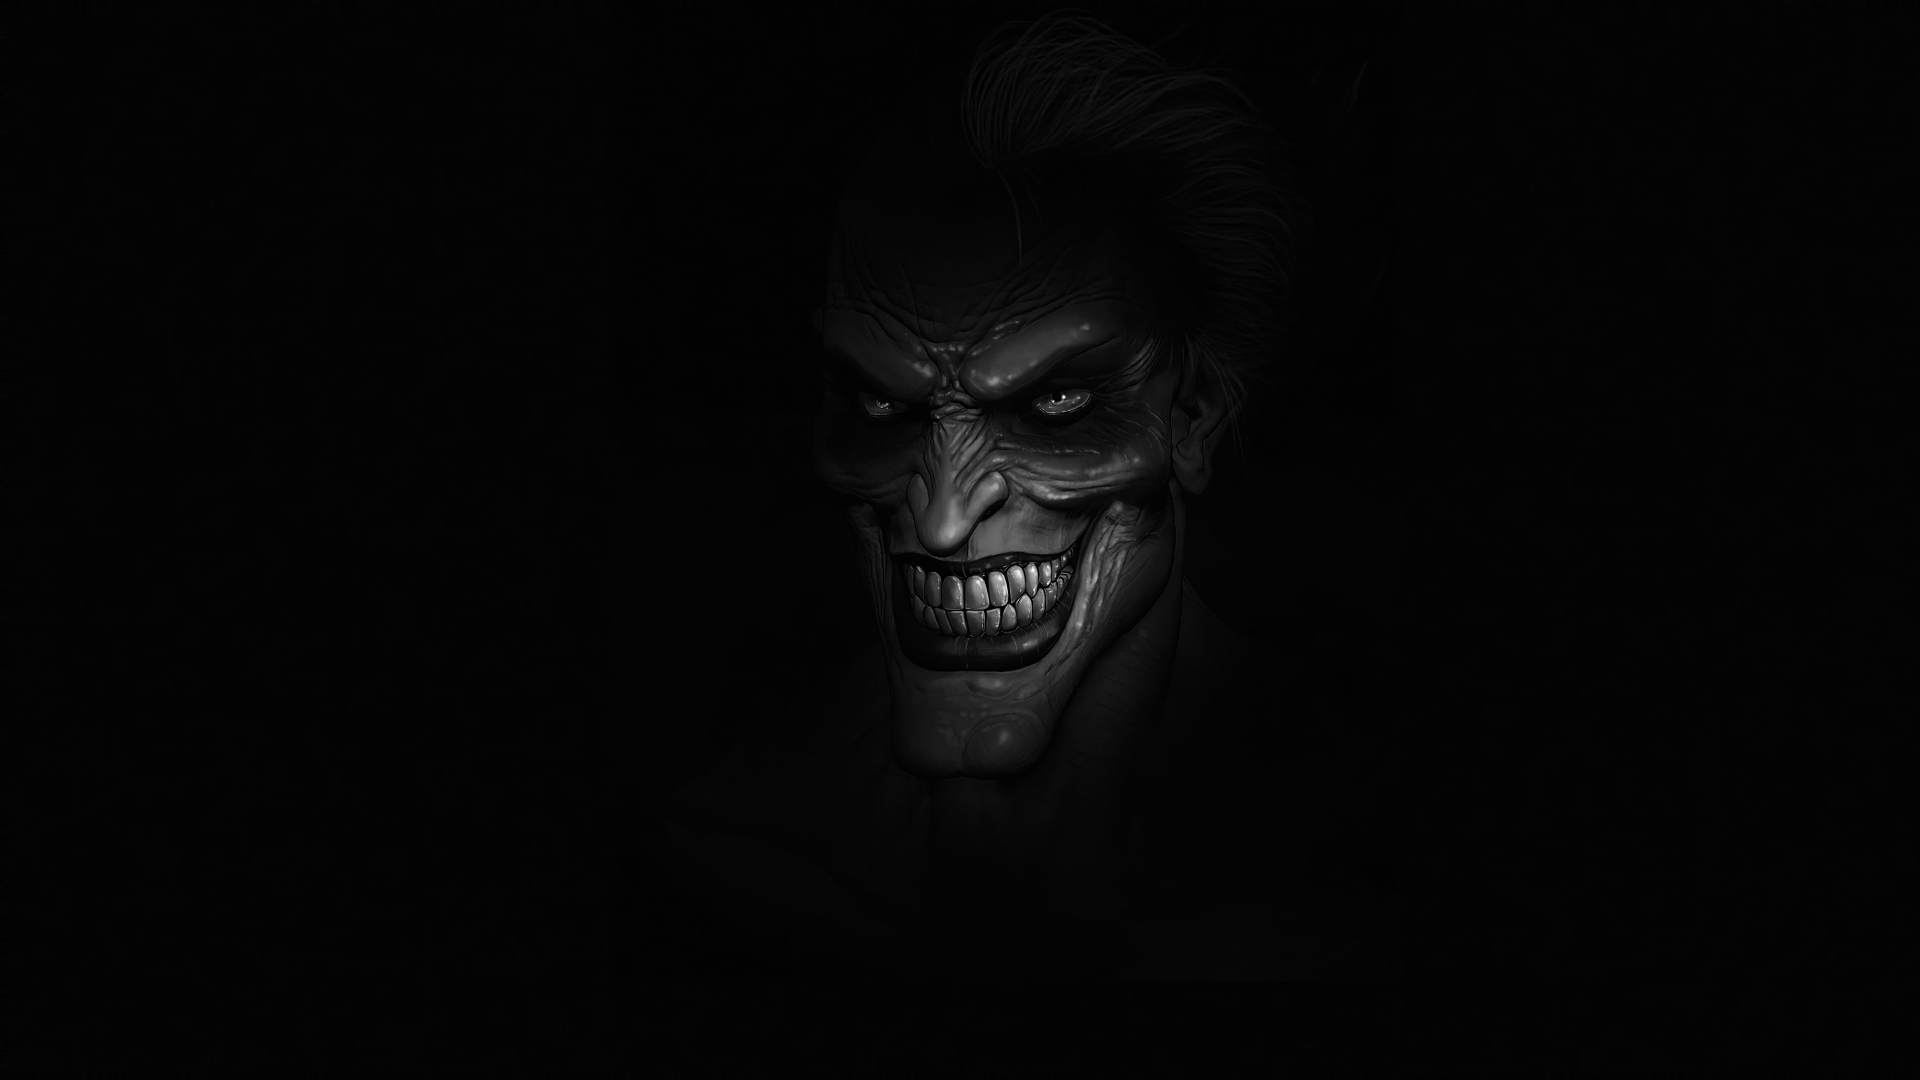

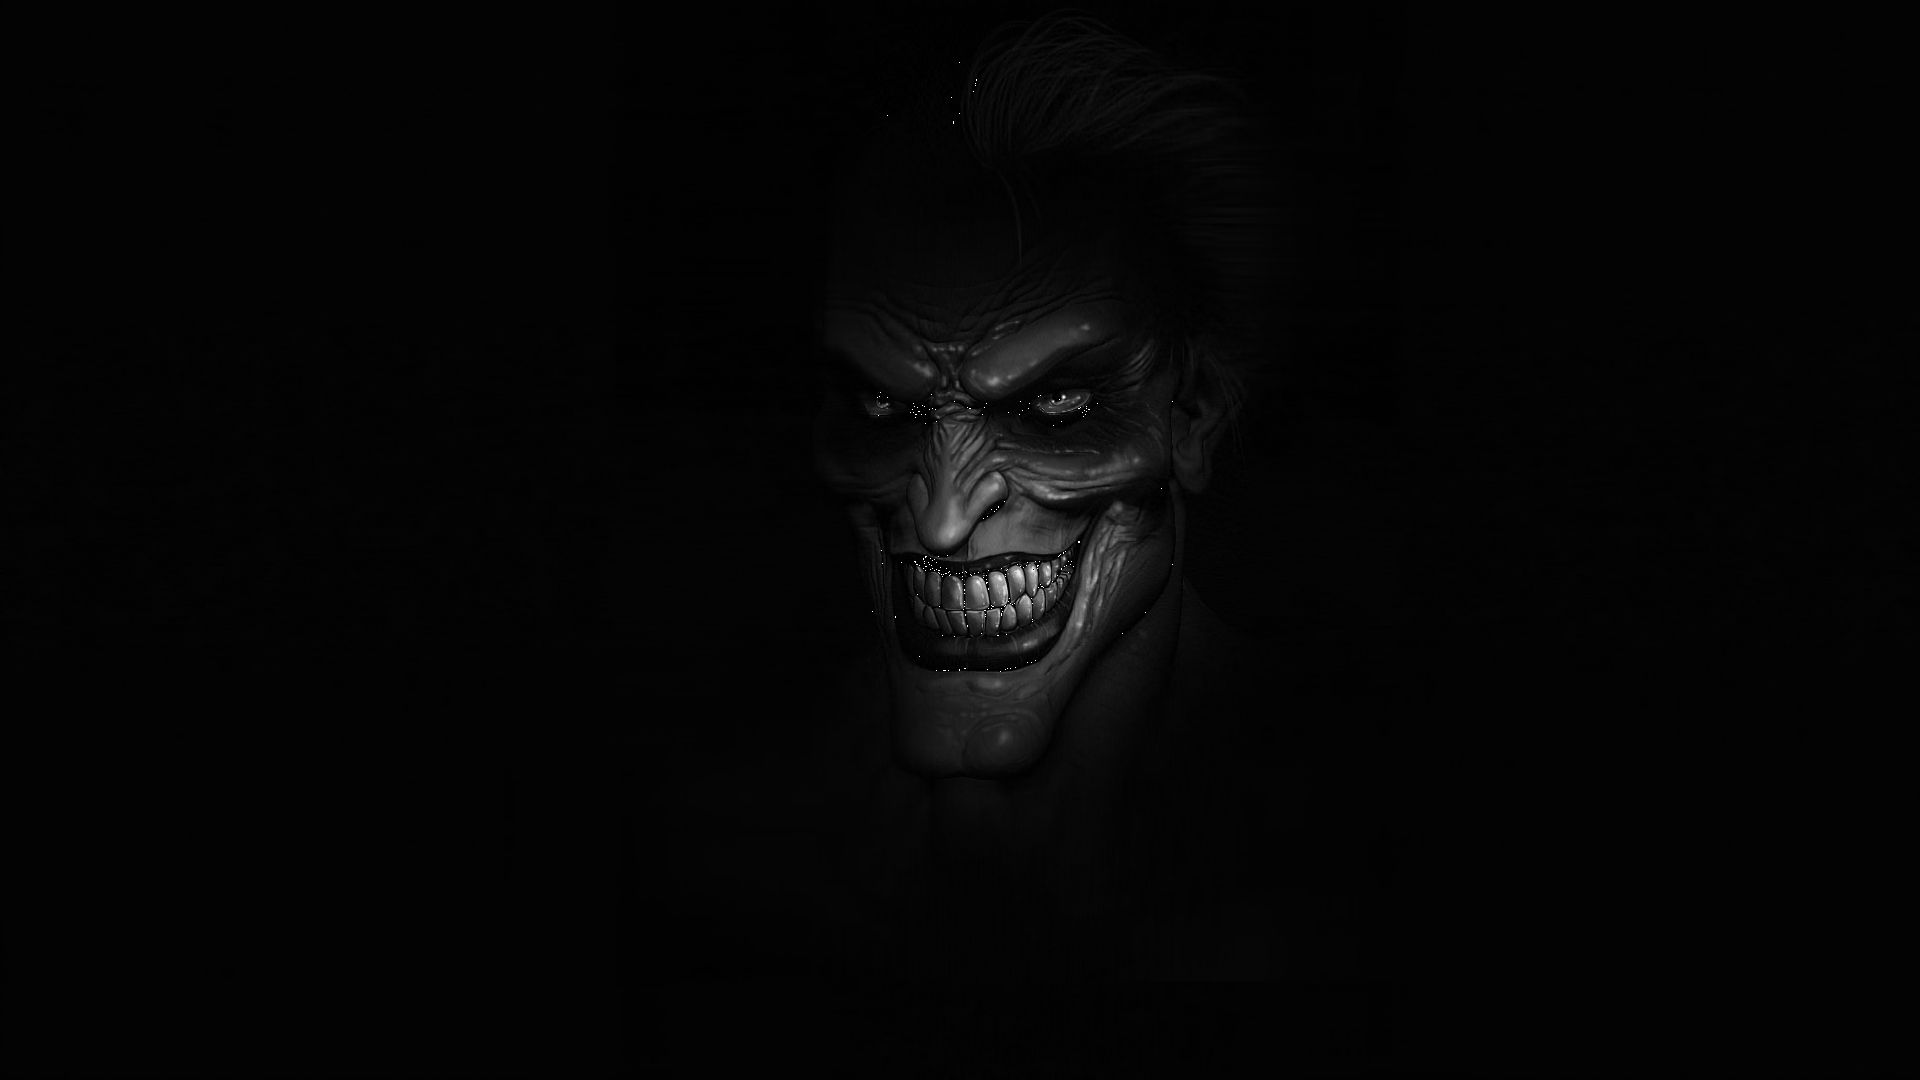

In [ ]:
# svd - for gray level
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load an image
image = cv2.imread('pepak.jpg', cv2.IMREAD_GRAYSCALE)

# Reshape the 2D image array to a 2D matrix
image_matrix = image.reshape(-1, image.shape[1])

# Perform SVD
U, S, Vt = np.linalg.svd(image_matrix, full_matrices=False)

# Reconstruct the image using a subset of singular values
k = 100  # Number of singular values to keep
reconstructed_image_matrix = np.dot(U[:, :k] * S[:k], Vt[:k, :])

# Reshape the reconstructed image matrix back to the original shape
reconstructed_image = reconstructed_image_matrix.reshape(image.shape)

# Display the original and reconstructed images using cv2_imshow
cv2_imshow(image)
cv2_imshow(reconstructed_image.astype(np.uint8))

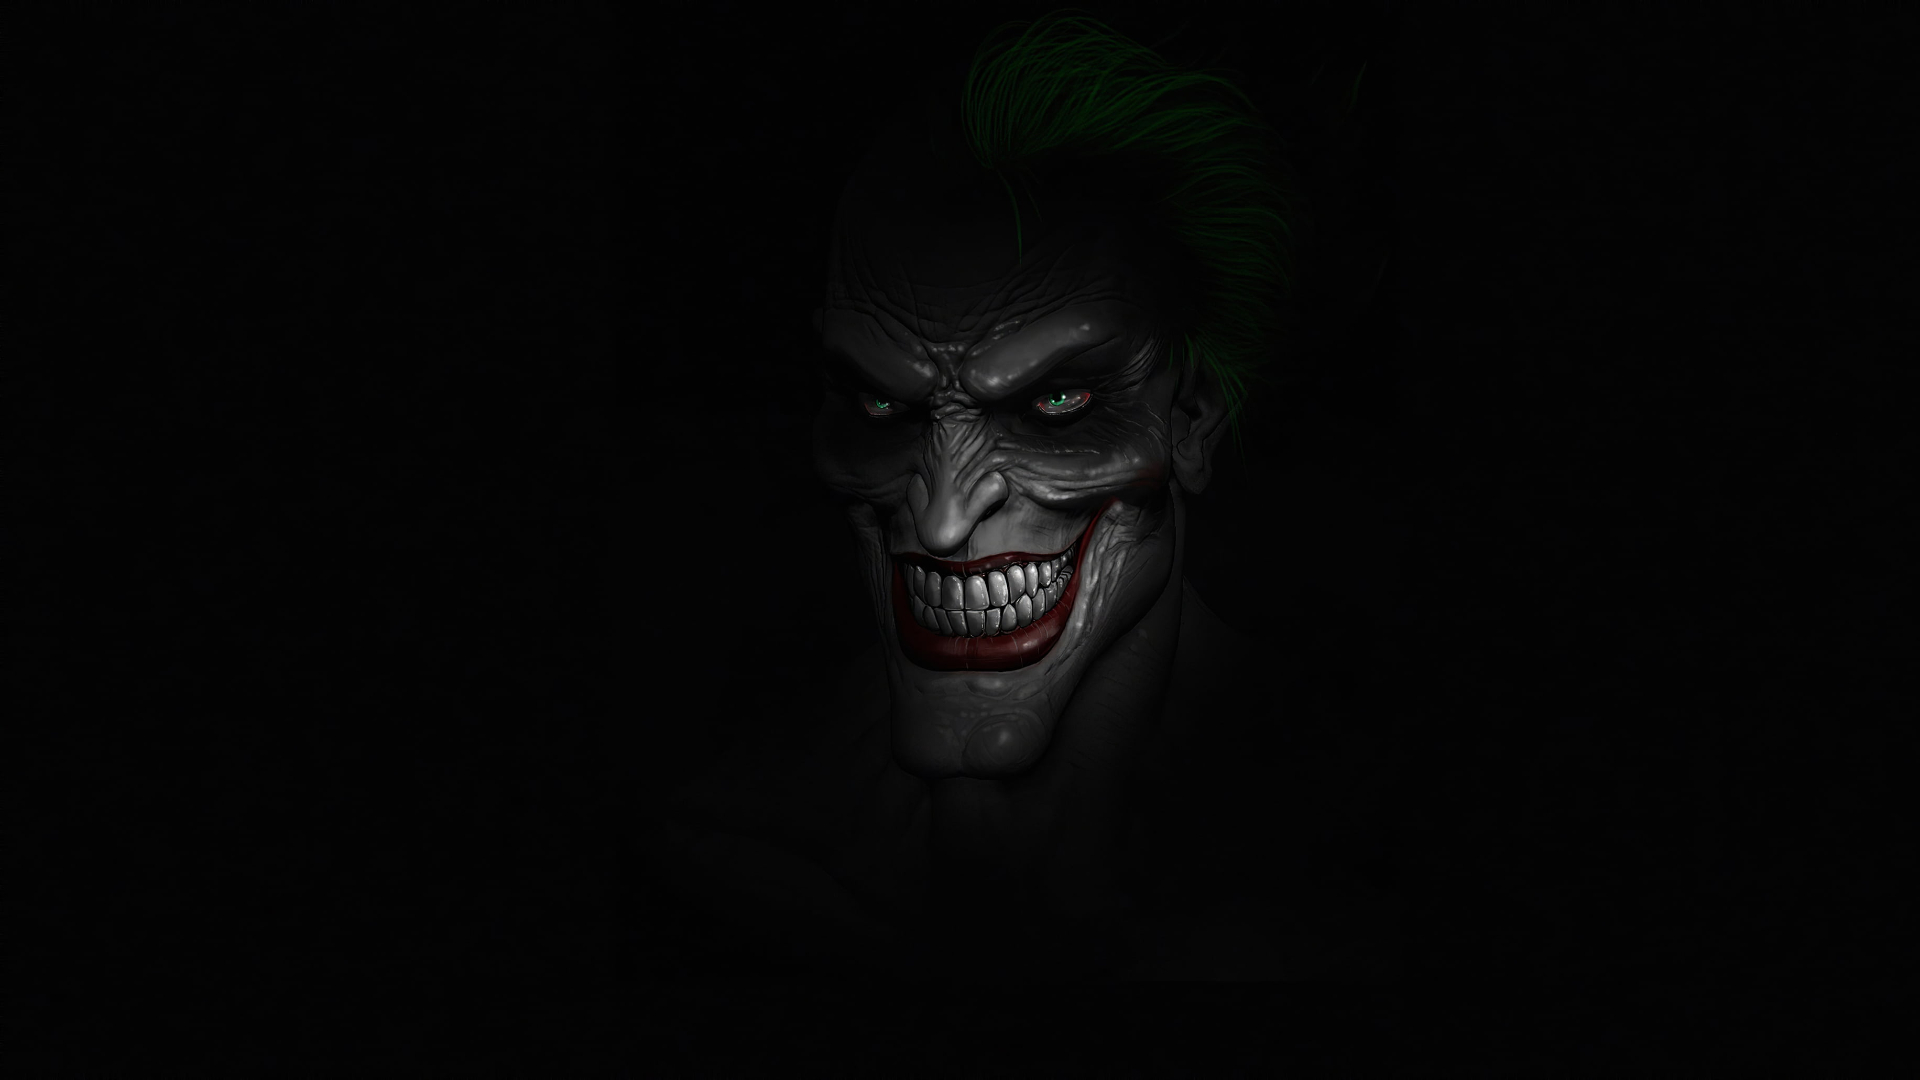

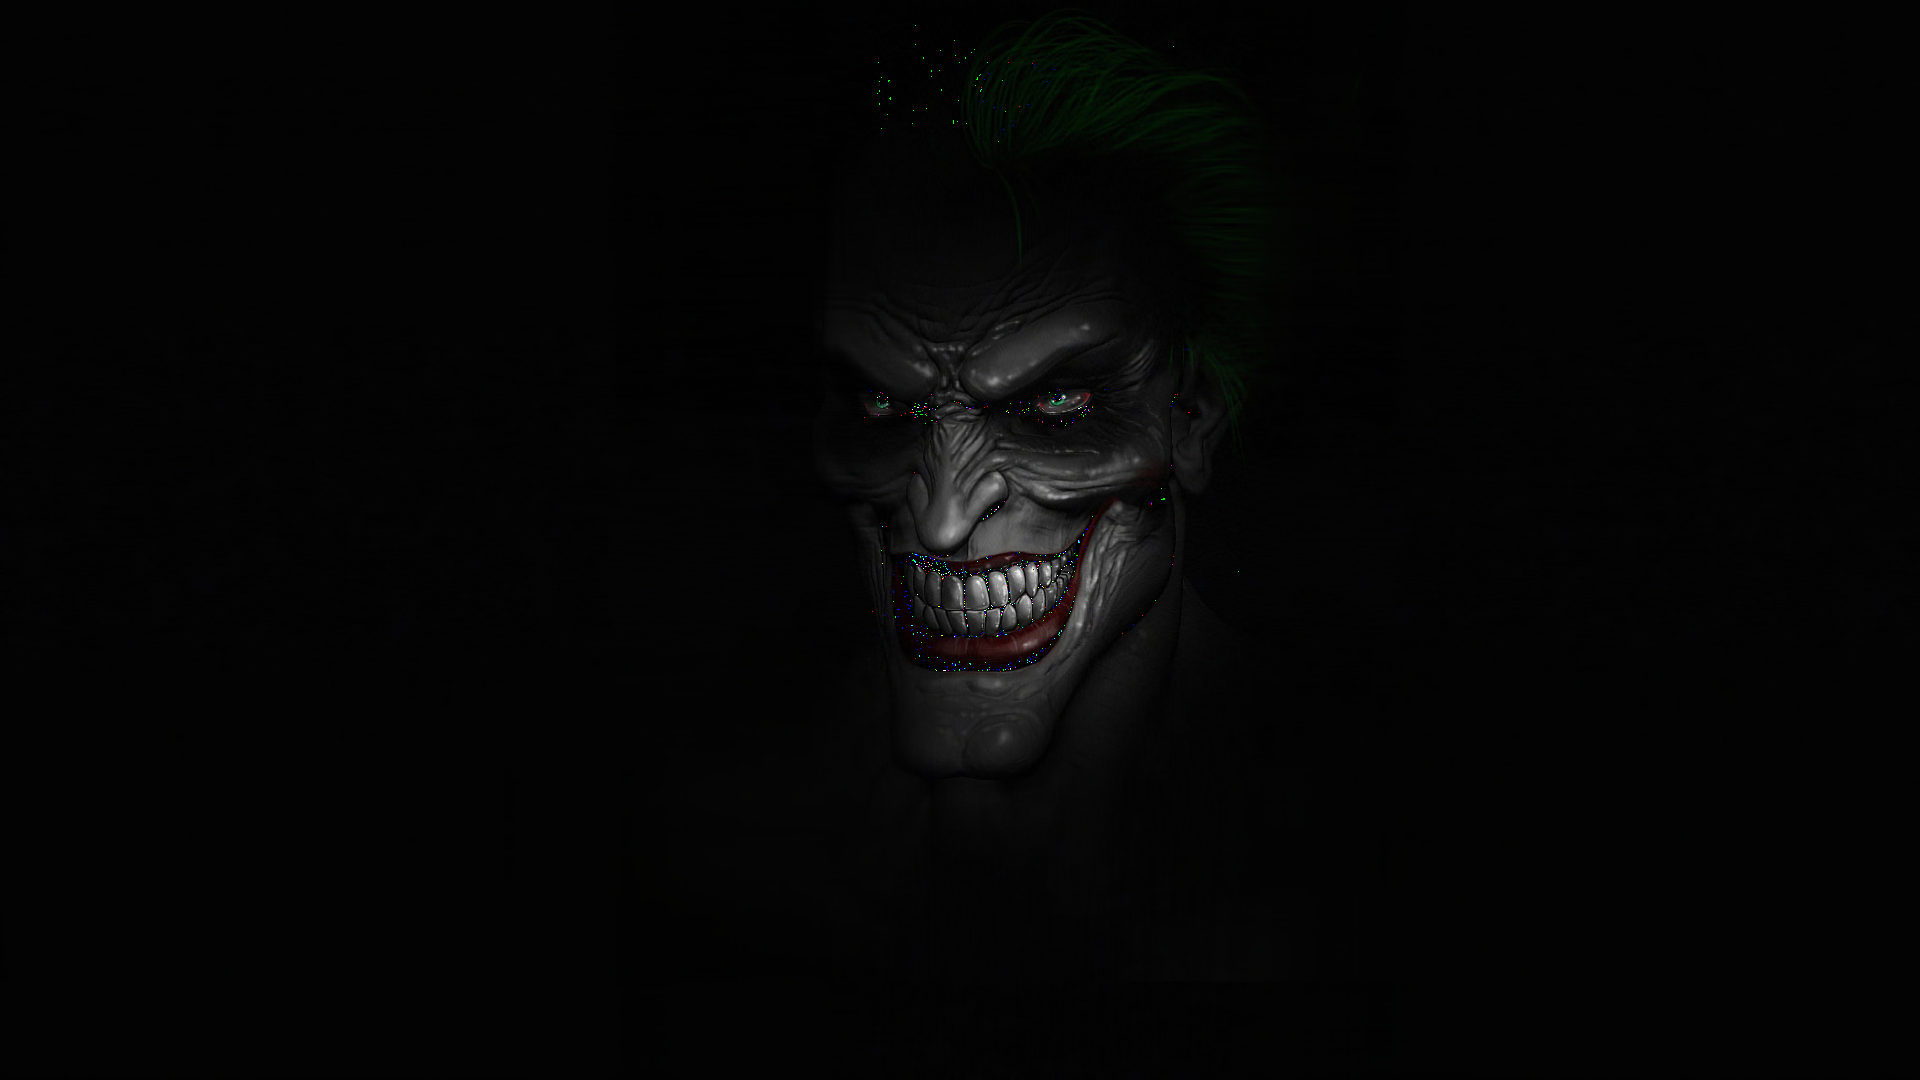

In [ ]:
# svd-RGB
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load a color image
image = cv2.imread('pepak.jpg')

# Split the image into RGB channels
R, G, B = cv2.split(image)

# Perform SVD on each channel
channels = [R, G, B]
reconstructed_channels = []

for channel in channels:
    # Reshape the 2D channel array to a 2D matrix
    channel_matrix = channel.reshape(-1, channel.shape[1])

    # Perform SVD
    U, S, Vt = np.linalg.svd(channel_matrix, full_matrices=False)

    # Reconstruct the channel using a subset of singular values
    k = 100  # Number of singular values to keep
    reconstructed_channel_matrix = np.dot(U[:, :k] * S[:k], Vt[:k, :])

    # Reshape the reconstructed channel matrix back to the original shape
    reconstructed_channel = reconstructed_channel_matrix.reshape(channel.shape)

    reconstructed_channels.append(reconstructed_channel)

# Merge the reconstructed channels back into a color image
reconstructed_image = cv2.merge(reconstructed_channels)

# Display the original and reconstructed images using cv2_imshow
cv2_imshow(image)
cv2_imshow(reconstructed_image.astype(np.uint8))